In [2]:
%load_ext sql
import pandas as pd
import numpy as np
import matplotlib as plt 
import seaborn as sns

In [3]:
%sql sqlite:///phonesData.db

In [38]:
%sql drop table if exists phones

 * sqlite:///phonesData.db
Done.


[]

In [39]:
%%sql 
CREATE TABLE if not exists phones(
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    ProductName VARCHAR(30) NOT NULL,
    Manufacturer VARCHAR(30) NOT NULL,
    ProductCount INT NOT NULL,
    Price INT NOT NULL
)

 * sqlite:///phonesData.db
Done.


[]

In [40]:
%%sql

INSERT INTO phones (ProductName, Manufacturer, ProductCount, Price)
VALUES ('iPhone X', 'Apple', 3, 76000),
    ('iPhone 8', 'Apple', 2, 51000),
    ('Galaxy S9', 'Samsung', 2, 56000),
    ('Galaxy S8', 'Samsung', 1, 41000),
    ('P20 Pro', 'Huawei', 5, 36000)

 * sqlite:///phonesData.db
5 rows affected.


[]

In [41]:
%sql select * from phones


 * sqlite:///phonesData.db
Done.


id,ProductName,Manufacturer,ProductCount,Price
1,iPhone X,Apple,3,76000
2,iPhone 8,Apple,2,51000
3,Galaxy S9,Samsung,2,56000
4,Galaxy S8,Samsung,1,41000
5,P20 Pro,Huawei,5,36000


In [42]:
result = %sql SELECT * FROM phones

df = pd.DataFrame(result)
headers = ['id','ProductName','Manufacturer','ProductCount','Price']
df.columns=headers
df.head(8)

 * sqlite:///phonesData.db
Done.


,id,ProductName,Manufacturer,ProductCount,Price
0,1,iPhone X,Apple,3,76000
1,2,iPhone 8,Apple,2,51000
2,3,Galaxy S9,Samsung,2,56000
3,4,Galaxy S8,Samsung,1,41000
4,5,P20 Pro,Huawei,5,36000


<Axes: xlabel='Manufacturer', ylabel='Price'>

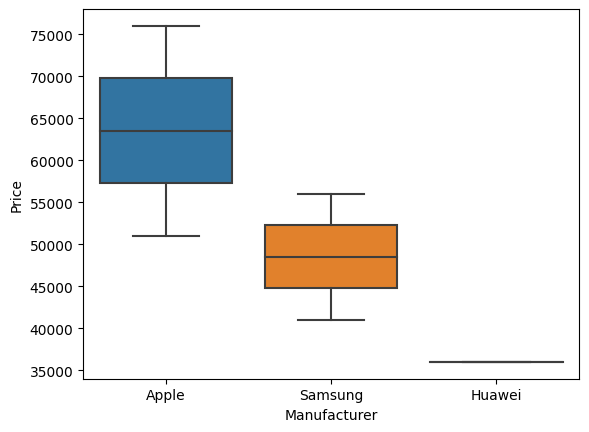

In [43]:
sns.boxplot(x='Manufacturer', y='Price', data=df)

In [44]:
%%sql 
SELECT ProductName, Manufacturer, Price 
FROM phones 
WHERE ProductCount > 2

 * sqlite:///phonesData.db
Done.


ProductName,Manufacturer,Price
iPhone X,Apple,76000
P20 Pro,Huawei,36000


In [45]:
%%sql 
SELECT ProductName, Price, ProductCount 
FROM phones 
WHERE Manufacturer = 'Samsung'

 * sqlite:///phonesData.db
Done.


ProductName,Price,ProductCount
Galaxy S9,56000,2
Galaxy S8,41000,1


In [11]:
%%sql 
SELECT * FROM phones 
WHERE ProductName LIKE '%Iphone%'

 * sqlite:///phonesData.db
Done.


id,ProductName,Manufacturer,ProductCount,Price
1,iPhone X,Apple,3,76000
2,iPhone 8,Apple,2,51000
6,iPhone X,Apple,3,76000
7,iPhone 8,Apple,2,51000
11,iPhone X,Apple,3,76000
12,iPhone 8,Apple,2,51000
16,iPhone X,Apple,3,76000
17,iPhone 8,Apple,2,51000


In [46]:
%%sql 
SELECT * FROM phones 
WHERE Manufacturer LIKE '%Samsung%'

 * sqlite:///phonesData.db
Done.


id,ProductName,Manufacturer,ProductCount,Price
3,Galaxy S9,Samsung,2,56000
4,Galaxy S8,Samsung,1,41000


In [47]:
%%sql 
SELECT * FROM phones 
WHERE ProductName REGEXP '[0-9]'

 * sqlite:///phonesData.db
(sqlite3.OperationalError) no such function: REGEXP
[SQL: SELECT * FROM phones 
WHERE ProductName REGEXP '[0-9]']
(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [48]:
%%sql 
SELECT * FROM phones 
WHERE ProductName LIKE '%8%'

 * sqlite:///phonesData.db
Done.


id,ProductName,Manufacturer,ProductCount,Price
2,iPhone 8,Apple,2,51000
4,Galaxy S8,Samsung,1,41000


## **Seminar 2**

План урока:
- Типы данных, значения NULL, create table, PK, FK, index
- Комментарии
- Арифметических операции
- Логические операторы (and, or, between, not, in)
- Приоритет выполнения операторов, порядок выполнения запроса
- Оператор CASE, IF
- Запросы изменения данных (insert, update, delete)

# **CASE IF**
Операторы CASE и IF являются условными операторами во многих языках программирования и SQL. Они позволяют выполнять различные действия в зависимости от условий.

1. Оператор CASE:

   Оператор CASE позволяет выполнить различные действия в зависимости от значения выражения или условия. Он имеет две формы: простую и поисковую.

   Простая форма оператора CASE выглядит следующим образом:

   
   <code>
       CASE expression

       WHEN value1 THEN result1

       WHEN value2 THEN result2

       ...

       ELSE result

   END
   </code>

   Здесь expression - выражение, значение которого будет сравниваться с value1, value2 и т.д. Если значение expression совпадает с одним из value, то возвращается соответствующий result. Если ни одно из значений не совпадает, возвращается result из блока ELSE (если он указан).

   Пример использования оператора CASE в SQL:
   
   <code>
          SELECT name, 

          CASE

              WHEN age < 18 THEN 'Minor'

              WHEN age >= 18 AND age < 65 THEN 'Adult'

              ELSE 'Senior'

          END AS age_group

   FROM users;
   </code>
   
   В этом примере оператор **CASE** используется для определения группы возраста на основе значения поля age в таблице users.

2. Оператор IF:
   Оператор IF позволяет выполнить различные действия в зависимости от условия. Он имеет следующую форму:
   
   <code>IF condition THEN

       statements

   ELSE

       statements

   END IF;</code>
   

   Здесь condition - логическое выражение, которое должно быть истинным или ложным. Если condition истинно, то выполняются statements в блоке THEN. Если condition ложно, то выполняются statements в блоке ELSE (если он указан).

   Пример использования оператора IF в SQL:

   
   <code>DECLARE @age INT;

   SET @age = 25;

   IF @age < 18 THEN

       SELECT 'Minor';

   ELSE

       SELECT 'Adult';
       
   END IF;</code>
   

   В этом примере оператор IF используется для определения, является ли значение переменной @age меньше 18 или нет, и выводит соответствующее сообщение.

Оба оператора CASE и IF могут быть очень полезными при написании условной логики в программировании и SQL, позволяя выполнять различные действия в зависимости от заданных условий.

В представленном коде на языке SQL используются несколько операторов. Давайте разберем их по порядку:

1. DECLARE: Этот оператор используется для объявления переменных в SQL. В данном случае, мы объявляем переменную @age типа INT.

2. SET: Оператор SET используется для присваивания значения переменной. В данном случае, мы присваиваем переменной @age значение 25.

3. IF: Оператор IF используется для выполнения условного оператора. Он проверяет условие и выполняет определенный блок кода, если условие истинно. В данном случае, мы проверяем, является ли значение переменной @age меньше 18.

4. THEN: THEN является ключевым словом, которое указывает начало блока кода, который будет выполнен, если условие в операторе IF истинно. В данном случае, если значение переменной @age меньше 18, будет выполнен следующий оператор SELECT.

5. SELECT: Оператор SELECT используется для выборки данных из таблицы или для возврата результата запроса. В данном случае, мы используем оператор SELECT для вывода строки 'Minor', если условие в операторе IF истинно.

6. ELSE: ELSE является ключевым словом, которое указывает начало блока кода, который будет выполнен, если условие в операторе IF ложно. В данном случае, если значение переменной @age больше или равно 18, будет выполнен следующий оператор SELECT.

7. END IF: END IF является ключевым словом, которое указывает конец блока кода оператора IF. В данном случае, мы завершаем оператор IF.

Таким образом, в данном коде мы объявляем переменную @age, присваиваем ей значение 25, а затем проверяем, является ли значение переменной меньше 18. В зависимости от результата проверки, выводится соответствующая строка 'Minor' или 'Adult'.

In [49]:
%%sql 
SELECT * FROM phones

 * sqlite:///phonesData.db
Done.


id,ProductName,Manufacturer,ProductCount,Price
1,iPhone X,Apple,3,76000
2,iPhone 8,Apple,2,51000
3,Galaxy S9,Samsung,2,56000
4,Galaxy S8,Samsung,1,41000
5,P20 Pro,Huawei,5,36000


In [50]:
%%sql 

SELECT *,
CASE
    WHEN Price < 50000 THEN 'High price'
    WHEN Price >= 50000 AND Price < 60000 THEN 'Normal price'
    ELSE 'Low price'
END AS Price_group

FROM phones

 * sqlite:///phonesData.db
Done.


id,ProductName,Manufacturer,ProductCount,Price,Price_group
1,iPhone X,Apple,3,76000,Low price
2,iPhone 8,Apple,2,51000,Normal price
3,Galaxy S9,Samsung,2,56000,Normal price
4,Galaxy S8,Samsung,1,41000,High price
5,P20 Pro,Huawei,5,36000,High price


В SQL порядок выполнения операторов зависит от их приоритета. Вот порядок выполнения для операторов

1. NOT: Оператор NOT имеет самый высокий приоритет и выполняется первым. Он используется для инвертирования логического выражения. Например, NOT TRUE вернет FALSE.

2. AND: Оператор AND выполняется после оператора NOT. Он используется для объединения двух или более логических выражений и возвращает TRUE, если оба выражения истинны. Например, TRUE AND TRUE вернет TRUE, а TRUE AND FALSE вернет FALSE.

3. OR: Оператор OR выполняется после оператора AND. Он также используется для объединения двух или более логических выражений, но возвращает TRUE, если хотя бы одно из выражений истинно. Например, TRUE OR FALSE вернет TRUE.

4. BETWEEN: Оператор BETWEEN используется для проверки, находится ли значение в заданном диапазоне. Он выполняется после операторов NOT, AND и OR. Например, value BETWEEN min_value AND max_value.

5. IN: Оператор IN используется для проверки, находится ли значение в списке значений. Он также выполняется после операторов NOT, AND и OR. Например, value IN (value1, value2, ...).

Важно отметить, что порядок выполнения операторов может быть изменен с использованием скобок. Вы можете использовать скобки, чтобы явно указать порядок выполнения операторов и управлять логическими выражениями в SQL.

In [51]:
%%sql
CREATE TABLE IF NOT EXISTS movies(
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    title VARCHAR(70) NOT NULL,
    year INT NOT NULL,
    running_time TIME NOT NULL,
    storyline TEXT NOT NULL
)


 * sqlite:///phonesData.db
Done.


[]

In [52]:
%%sql
INSERT into movies (title, year, running_time, storyline) 
VALUES ('Harry Potter and the Philosophers Stone', 2001, 152, "An orphaned boy enrolls in a school of wizardry, where he learns the truth about himself, his family and the terrible evil that haunts the magical world."),
('Harry Potter and the Chamber of Secrets', 2002, 162,"An ancient prophecy seems to be coming true when a mysterious presence begins stalking the corridors of a school of magic and leaving its victims paralyzed."),
('The Green Mile', 1999, 188,'Death Row guards at a penitentiary, in the 1930s, have a moral dilemma with their job when they discover one of their prisoners, a convicted murderer, has a special gift.'),
('Forrest Gump', 1994, 142,"The presidencies of Kennedy and Johnson, the Vietnam War, the Watergate scandal and other historical events unfold from the perspective of an Alabama man with an IQ of 75, whose only desire is to be reunited with his childhood sweetheart.")

 * sqlite:///phonesData.db
4 rows affected.


[]

SET NULL - это один из вариантов ограничения обновления или удаления для внешнего ключа в SQL. Когда установлено ограничение SET NULL, при обновлении значения в поле, на которое ссылается внешний ключ, или при удалении записи из таблицы с внешним ключом, значения в поле, на которое ссылается внешний ключ, будут установлены в NULL.

Другими словами, если у вас есть внешний ключ, который ссылается на поле в другой таблице, и вы обновляете значение в этом поле или удаляете запись, на которую ссылается внешний ключ, то все записи в таблице с внешним ключом, которые ссылались на это значение или запись, будут иметь значение NULL в поле, на которое ссылается внешний ключ.

Например, предположим, у нас есть таблицы "Orders" и "Customers", и поле "CustomerID" в таблице "Orders" является внешним ключом, который ссылается на поле "CustomerID" в таблице "Customers". Если мы установим ограничение обновления SET NULL для этого внешнего ключа, и затем обновим значение "CustomerID" в таблице "Customers", все записи в таблице "Orders", которые ссылались на это значение, будут иметь значение NULL в поле "CustomerID".

Ограничение SET NULL полезно, когда вы хотите сохранить целостность данных и не потерять связь между записями, но при этом разрешить обновление или удаление связанных записей.

Для создания внешнего ключа с ограничениями удаления и обновления в SQL, следуйте этим шагам:

1. Создайте таблицу, в которой будет внешний ключ, и таблицу, на которую будет ссылаться внешний ключ. Например, у нас есть таблица "Orders" с полем "CustomerID", которое будет ссылаться на поле "CustomerID" в таблице "Customers".

2. Убедитесь, что поле, на которое будет ссылаться внешний ключ, имеет уникальное ограничение. В нашем случае, поле "CustomerID" в таблице "Customers" должно быть уникальным.

3. Создайте внешний ключ в таблице "Orders" с помощью оператора ALTER TABLE. Укажите имя внешнего ключа, поле, которое будет ссылаться на внешний ключ, и таблицу и поле, на которые будет ссылаться внешний ключ. Например:

ALTER TABLE Orders
ADD CONSTRAINT FK_CustomerID
FOREIGN KEY (CustomerID)
REFERENCES Customers(CustomerID)


4. Добавьте ограничение удаления и обновления для внешнего ключа. Ограничение удаления определяет, что произойдет с записями в таблице, на которую ссылается внешний ключ, при удалении записи из таблицы с внешним ключом. Ограничение обновления определяет, что произойдет с записями в таблице, на которую ссылается внешний ключ, при обновлении значения в поле, на которое ссылается внешний ключ. Доступные варианты для ограничений удаления и обновления включают CASCADE, SET NULL, SET DEFAULT и NO ACTION.

Пример с ограничением удаления CASCADE и ограничением обновления SET NULL:

ALTER TABLE Orders
ADD CONSTRAINT FK_CustomerID
FOREIGN KEY (CustomerID)
REFERENCES Customers(CustomerID)
ON DELETE CASCADE
ON UPDATE SET NULL


Теперь у вас есть внешний ключ с ограничениями удаления и обновления.

In [53]:
%%sql
CREATE TABLE IF NOT EXISTS studentMarks (
stud_id INTEGER PRIMARY KEY AUTOINCREMENT, 
total_marks INT, 
grade VARCHAR(5))

 * sqlite:///phonesData.db
Done.


[]

In [54]:
%%sql
INSERT into studentMarks(total_marks, grade)
VALUES
(450, 'A'), 
(480, 'A+'), 
(490, 'A++'), 
(440, 'B+'),
(400, 'C+'),
(380,'C'),
(250, 'D'),
(200,'E'),
(100,'F'),
(150,'F'),
(220, 'E')

 * sqlite:///phonesData.db
11 rows affected.


[]

Наименование столбца по которому идет классификация может записываться после кейс, в таком случае после when уго писать не нужно, если в классификации несколько столбцов, их прописывают после when

In [ ]:
%%sql 

SELECT *,
CASE grade
    WHEN 'A++' THEN 'DISTINCTION'
    WHEN 'A+' then 'FIRST CLASS'
    WHEN 'A' THEN 'SECOND CLASS'
    WHEN 'B+' THEN 'SECOND CLASS'
    WHEN 'C+' then 'THIRD CLASS'
    ELSE 'FAIL'
END AS grade_group

FROM studentMarks

In [22]:
%%sql 

SELECT *,
CASE 
    WHEN total_marks > 450  
    THEN 'DISTINCTION'
    WHEN total_marks between 400 and 450 
    then 'FIRST CLASS'
    WHEN total_marks between 350 and 400 
    then 'SECOND CLASS'
    WHEN total_marks between 300 and 350 
    then 'THIRD CLASS'
    ELSE 'FAIL'
END AS grade_group_by_mark

FROM studentMarks

 * sqlite:///phonesData.db
Done.


stud_id,total_marks,grade,grade_group_by_mark
1,450,A,FIRST CLASS
2,480,A+,DISTINCTION
3,490,A++,DISTINCTION
4,440,B+,FIRST CLASS
5,400,C+,FIRST CLASS
6,380,C,SECOND CLASS
7,250,D,FAIL
8,200,E,FAIL
9,100,F,FAIL
10,150,F,FAIL


IF условие THEN
    -- код, который будет выполнен, если условие истинно
ELSE
    -- код, который будет выполнен, если условие ложно
END IF;

In [23]:
%%sql
CREATE TABLE workers 
(
id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
name VARCHAR(50) NOT NULL,
surname VARCHAR(50) NOT NULL,
specialty VARCHAR(50) NOT NULL,
seniority INT NOT NULL,
salary INT NOT NULL,
age INT NOT NULL
)


 * sqlite:///phonesData.db
(sqlite3.OperationalError) table workers already exists
[SQL: CREATE TABLE workers 
(
id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,
name VARCHAR(50) NOT NULL,
surname VARCHAR(50) NOT NULL,
specialty VARCHAR(50) NOT NULL,
seniority INT NOT NULL,
salary INT NOT NULL,
age INT NOT NULL
)]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [24]:
%%sql
insert into workers (name, surname, specialty, seniority, salary, age)
values
('Вася',	'Васькин',	'Начальник',	40,	100000,	60),
('Петя',	'Петькин',	'Начальник',	8,	70000,	30),
('Катя',	'Катькина',	'Инженер',	2,	70000,	25),
('Саша',	'Сашкин',	'Инженер',	12,	50000,	35),
('Иван',	'Иванов',	'Рабочий',	40,	30000,	59),
('Юра',	'Юркин',	'Рабочий',	5,	15000,	25),
('Максим',	'Воронин',	'Рабочий',	2,	11000,	22)

 * sqlite:///phonesData.db
7 rows affected.


[]

In [25]:
%sql select name, surname, age from workers order by name desc

 * sqlite:///phonesData.db
Done.


name,surname,age
Юра,Юркин,25
Юра,Юркин,25
Саша,Сашкин,35
Саша,Сашкин,35
Петя,Петькин,30
Петя,Петькин,30
Максим,Воронин,22
Максим,Воронин,22
Катя,Катькина,25
Катя,Катькина,25


In [26]:
%sql select * from workers order by name, age desc limit 10

 * sqlite:///phonesData.db
Done.


id,name,surname,specialty,seniority,salary,age
1,Вася,Васькин,Начальник,40,100000,60
8,Вася,Васькин,Начальник,40,100000,60
5,Иван,Иванов,Рабочий,40,30000,59
12,Иван,Иванов,Рабочий,40,30000,59
3,Катя,Катькина,Инженер,2,70000,25
10,Катя,Катькина,Инженер,2,70000,25
7,Максим,Воронин,Рабочий,2,11000,22
14,Максим,Воронин,Рабочий,2,11000,22
2,Петя,Петькин,Начальник,8,70000,30
9,Петя,Петькин,Начальник,8,70000,30


In [27]:
%sql select * from workers order by id desc limit 2,3 

 * sqlite:///phonesData.db
Done.


id,name,surname,specialty,seniority,salary,age
12,Иван,Иванов,Рабочий,40,30000,59
11,Саша,Сашкин,Инженер,12,50000,35
10,Катя,Катькина,Инженер,2,70000,25


In [28]:
%sql select sum(salary) from workers

 * sqlite:///phonesData.db
Done.


sum(salary)
692000


In [29]:
%sql select sum(salary) from workers group by specialty

 * sqlite:///phonesData.db
Done.


sum(salary)
240000
340000
112000


Сгруппируйте поля по возрасту (будет 3 группы - 23 года, 24 года и 25 лет). Для каждой группы  найдите суммарную зарплату

In [30]:
%%sql
SELECT age, SUM(salary) AS total_salary
FROM workers
GROUP BY age

 * sqlite:///phonesData.db
Done.


age,total_salary
22,22000
25,170000
30,140000
35,100000
59,60000
60,200000


In [31]:
%%sql
SELECT age, MAX(salary) AS total_salary
FROM workers
GROUP BY age

 * sqlite:///phonesData.db
Done.


age,total_salary
22,11000
25,70000
30,70000
35,50000
59,30000
60,100000


In [32]:
%%sql
SELECT age, SUM(salary) AS total_salary
FROM workers
GROUP BY age
having total_salary  >=50000

 * sqlite:///phonesData.db
Done.


age,total_salary
25,170000
30,140000
35,100000
59,60000
60,200000


In [33]:
%sql select * from workers

 * sqlite:///phonesData.db
Done.


id,name,surname,specialty,seniority,salary,age
1,Вася,Васькин,Начальник,40,100000,60
2,Петя,Петькин,Начальник,8,70000,30
3,Катя,Катькина,Инженер,2,70000,25
4,Саша,Сашкин,Инженер,12,50000,35
5,Иван,Иванов,Рабочий,40,30000,59
6,Юра,Юркин,Рабочий,5,15000,25
7,Максим,Воронин,Рабочий,2,11000,22
8,Вася,Васькин,Начальник,40,100000,60
9,Петя,Петькин,Начальник,8,70000,30
10,Катя,Катькина,Инженер,2,70000,25


In [34]:
%%sql
SELECT age
FROM workers
GROUP BY age
having count(age) <=2

 * sqlite:///phonesData.db
Done.


age
22
30
35
59
60


In [35]:
%%sql
SELECT age, COUNT(*) AS row_count
FROM workers
GROUP BY age
HAVING COUNT(*) in  (1,2)

 * sqlite:///phonesData.db
Done.


age,row_count
22,2
30,2
35,2
59,2
60,2


In [36]:
%%sql
SELECT age, COUNT(*) AS row_count
FROM workers
GROUP BY age
HAVING COUNT(*) between  1 and 2

 * sqlite:///phonesData.db
Done.


age,row_count
22,2
30,2
35,2
59,2
60,2
